              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         1
     neutral       0.00      0.00      0.00         1
    positive       0.33      1.00      0.50         1

    accuracy                           0.33         3
   macro avg       0.11      0.33      0.17         3
weighted avg       0.11      0.33      0.17         3



C:\Users\dhane\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\dhane\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\dhane\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capital

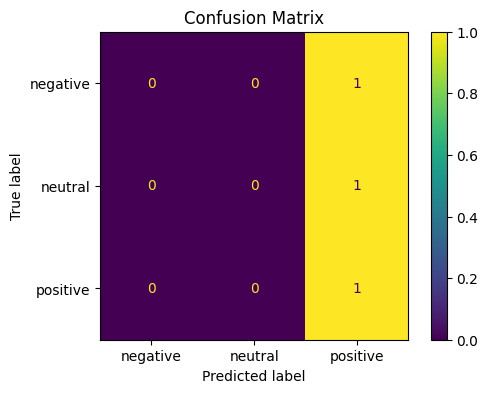

In [3]:
import pandas as pd
import numpy as np
import re
import os
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

if os.path.exists('data.csv'):
    df = pd.read_csv('data.csv')
else:
    s=[('I love this product','positive'),
       ('Terrible item','negative'),
       ('Not bad but late','negative'),
       ('Absolutely fantastic','positive'),
       ('Mediocre service','neutral'),
       ('Worst ever','negative'),
       ('Nice quality','positive'),
       ('It is okay','neutral'),
       ('Loved the color','positive'),
       ('Disappointed','negative')]
    df=pd.DataFrame(s,columns=['text','label'])

STOP=set(['the','and','is','in','it','this','that','a','an','to','for','of','was','were','with','as','a','on'])

def clean(t):
    t=str(t).lower()
    t=re.sub(r'http\\S+|www\\S+','',t)
    t=re.sub(r'@\\w+','',t)
    t=re.sub(r'#\\w+','',t)
    t=re.sub(r'[^a-z0-9\\s]',' ',t)
    t=re.sub(r'\\s+',' ',t).strip()
    t=[w for w in t.split() if w not in STOP]
    return ' '.join(t)

df['clean']=df['text'].apply(clean)

v=TfidfVectorizer(max_features=5000,ngram_range=(1,2))
X=v.fit_transform(df['clean'])
y=df['label']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42,stratify=y)
m=LogisticRegression(max_iter=1000)
m.fit(X_train,y_train)

y_pred=m.predict(X_test)
print(classification_report(y_test,y_pred))

cm=confusion_matrix(y_test,y_pred,labels=m.classes_)
d=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=m.classes_)
fig,ax=plt.subplots(figsize=(6,4))
d.plot(ax=ax)
plt.title("Confusion Matrix")
plt.show()


Enter text:  i hate tee


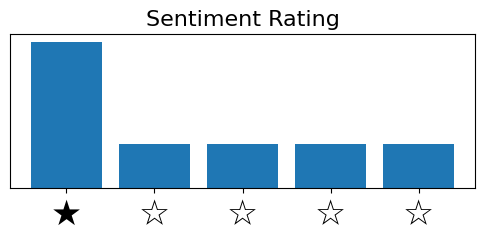

In [7]:
import re
import matplotlib.pyplot as plt
from textblob import TextBlob
def clean(t):
    t=t.lower()
    t=re.sub(r'http\\S+|www\\S+','',t)
    t=re.sub(r'@\\w+','',t)
    t=re.sub(r'#\\w+','',t)
    t=re.sub(r'[^a-z0-9\\s]',' ',t)
    t=re.sub(r'\\s+',' ',t).strip()
    return t
text=input("Enter text: ")
c=clean(text)
p=TextBlob(c).sentiment.polarity

if p<=-0.5: s=1
elif p<0: s=2
elif p==0: s=3
elif p<0.5: s=4
else: s=5
stars=["★" if i<s else "☆" for i in range(5)]

plt.figure(figsize=(6,2))
plt.bar(range(1,6),[1 if i<s else 0.3 for i in range(5)])
plt.xticks(range(1,6),stars,fontsize=25)
plt.yticks([])
plt.title("Sentiment Rating",fontsize=16)
plt.show()


Enter text:  c


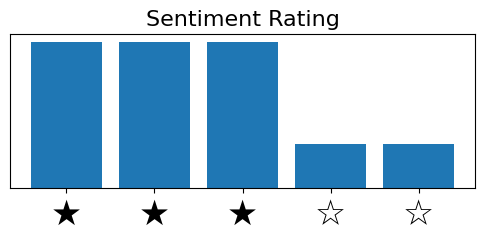

In [12]:
import re
import matplotlib.pyplot as plt
from textblob import TextBlob  
text=input("Enter text: ")
c=clean(text)
p=TextBlob(c).sentiment.polarity
if p<=-0.5: s=1
elif p<0: s=2
elif p==0: s=3
elif p<0.5: s=4
else: s=5
stars=["★" if i<s else "☆" for i in range(5)]
plt.figure(figsize=(6,2))
plt.bar(range(1,6),[1 if i<s else 0.3 for i in range(5)])
plt.xticks(range(1,6),stars,fontsize=25)
plt.yticks([])
plt.title("Sentiment Rating",fontsize=16)
plt.show()


In [6]:
!pip install textblob


  Using cached textblob-0.19.0-py3-none-any.whl.metadata (4.4 kB)
Using cached textblob-0.19.0-py3-none-any.whl (624 kB)


Enter text:  i am happy


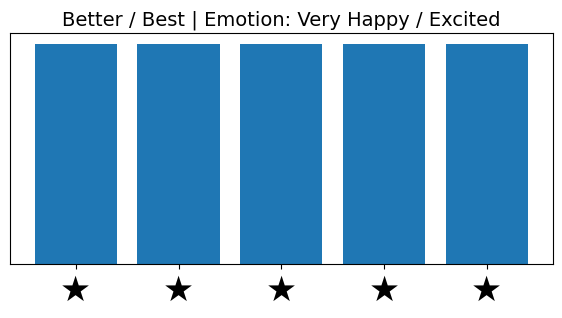

In [13]:
import re
import matplotlib.pyplot as plt
from textblob import TextBlob

def clean(t):
    return re.sub(r'[^a-zA-Z\s]', '', t.lower())

def emotion_label(p):
    if p <= -0.5: return "Sad / Angry"
    if p < 0:    return "Upset / Low"
    if p == 0:   return "Neutral / Normal"
    if p < 0.5:  return "Happy / Calm"
    return "Very Happy / Excited"

def scale_label(p):
    if p <= -0.5: return "Very Bad"
    if p < 0:    return "Bad"
    if p == 0:   return "Normal"
    if p < 0.5:  return "Good"
    return "Better / Best"

text = input("Enter text: ")
c = clean(text)
p = TextBlob(c).sentiment.polarity

level = scale_label(p)
emotion = emotion_label(p)

score = {
    "Very Bad":1,
    "Bad":2,
    "Normal":3,
    "Good":4,
    "Better / Best":5
}[level]

stars = ["★" if i < score else "☆" for i in range(5)]

plt.figure(figsize=(7,3))
plt.bar(range(1,6), [1 if i < score else 0.2 for i in range(5)])
plt.xticks(range(1,6), stars, fontsize=25)
plt.yticks([])
plt.title(f"{level} | Emotion: {emotion}", fontsize=14)
plt.show()


Enter text:  happy


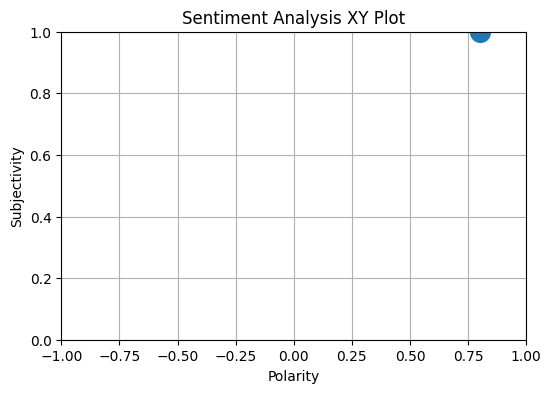

In [15]:
import re
import matplotlib.pyplot as plt
from textblob import TextBlob

def clean(t):
    return re.sub(r'[^a-zA-Z\s]', '', t.lower())

text = input("Enter text: ")
c = clean(text)
p = TextBlob(c).sentiment.polarity
s = TextBlob(c).sentiment.subjectivity

plt.figure(figsize=(6,4))
plt.scatter(p, s, s=200)
plt.xlim(-1,1)
plt.ylim(0,1)
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.title("Sentiment Analysis XY Plot")
plt.grid(True)
plt.show()


Enter text:  Not bad but late



--- SENTIMENT TABLE RESULT ---
Polarity Score : 0.024999999999999967
Sentiment Level: good
Emotion Tag    : happy


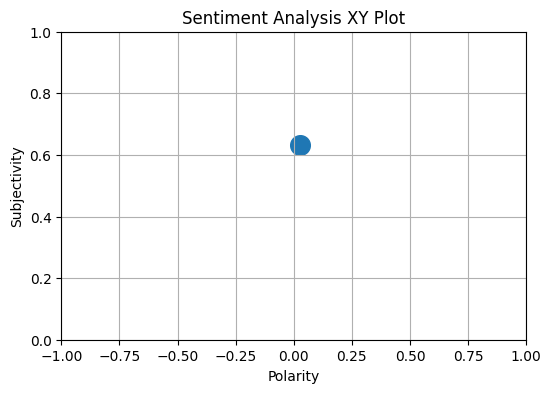

In [18]:
import re
from textblob import TextBlob

def clean(t):
    return re.sub(r'[^a-zA-Z\s]', '', t.lower())

def sentiment_truth(p):
    if p <= -0.5:
        return "very bad", "sad"
    elif p < 0:
        return "bad", "unhappy"
    elif p == 0:
        return "normal", "neutral"
    elif p < 0.5:
        return "good", "happy"
    else:
        return "best", "excited"

text = input("Enter text: ")
c = clean(text)
p = TextBlob(c).sentiment.polarity
s = TextBlob(c).sentiment.subjectivity

plt.figure(figsize=(6,4))
plt.scatter(p, s, s=200)
plt.xlim(-1,1)
plt.ylim(0,1)
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.title("Sentiment Analysis XY Plot")
plt.grid(True)
level, emotion = sentiment_truth(p)

print("\n--- SENTIMENT TABLE RESULT ---")
print(f"Polarity Score : {p}")
print(f"Sentiment Level: {level}")
print(f"Emotion Tag    : {emotion}")


Enter text:  It is okay


              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         1
     neutral       0.00      0.00      0.00         1
    positive       0.33      1.00      0.50         1

    accuracy                           0.33         3
   macro avg       0.11      0.33      0.17         3
weighted avg       0.11      0.33      0.17         3



C:\Users\dhane\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\dhane\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\dhane\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capital

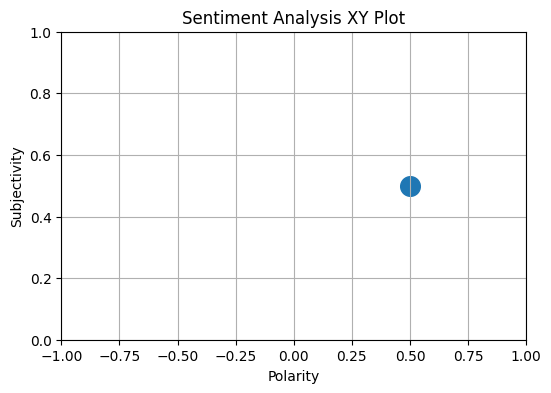

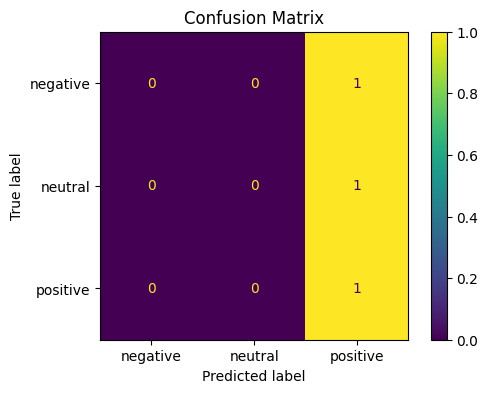


--- SENTIMENT TABLE RESULT ---
Polarity Score : <Compressed Sparse Row sparse matrix of dtype 'float64'
	with 30 stored elements and shape (10, 30)>
  Coords	Values
  (0, 12)	0.5773502691896257
  (0, 23)	0.5773502691896257
  (0, 13)	0.5773502691896257
  (1, 26)	0.5773502691896257
  (1, 10)	0.5773502691896257
  (1, 27)	0.5773502691896257
  (2, 20)	0.3779644730092272
  (2, 2)	0.3779644730092272
  (2, 4)	0.3779644730092272
  (2, 11)	0.3779644730092272
  (2, 21)	0.3779644730092272
  (2, 3)	0.3779644730092272
  (2, 5)	0.3779644730092272
  (3, 0)	0.5773502691896257
  (3, 9)	0.5773502691896257
  (3, 1)	0.5773502691896257
  (4, 16)	0.5773502691896257
  (4, 25)	0.5773502691896257
  (4, 17)	0.5773502691896257
  (5, 28)	0.5773502691896257
  (5, 8)	0.5773502691896257
  (5, 29)	0.5773502691896257
  (6, 18)	0.5773502691896257
  (6, 24)	0.5773502691896257
  (6, 19)	0.5773502691896257
  (7, 22)	1.0
  (8, 14)	0.5773502691896257
  (8, 6)	0.5773502691896257
  (8, 15)	0.5773502691896257
  (9, 7)	1.0
Sent

In [19]:
import re
from textblob import TextBlob

def clean(t):
    return re.sub(r'[^a-zA-Z\s]', '', t.lower())

def sentiment_truth(p):
    if p <= -0.5:
        return "very bad", "sad"
    elif p < 0:
        return "bad", "unhappy"
    elif p == 0:
        return "normal", "neutral"
    elif p < 0.5:
        return "good", "happy"
    else:
        return "best", "excited"

text = input("Enter text: ")
c = clean(text)
p = TextBlob(c).sentiment.polarity
s = TextBlob(c).sentiment.subjectivity

plt.figure(figsize=(6,4))
plt.scatter(p, s, s=200)
plt.xlim(-1,1)
plt.ylim(0,1)
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.title("Sentiment Analysis XY Plot")
plt.grid(True)
level, emotion = sentiment_truth(p)

c=TfidfVectorizer(max_features=5000,ngram_range=(1,2))
p=v.fit_transform(df['clean'])
s=df['label']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42,stratify=y)
m=LogisticRegression(max_iter=1000)
m.fit(X_train,y_train)

y_pred=m.predict(X_test)
print(classification_report(y_test,y_pred))

cm=confusion_matrix(y_test,y_pred,labels=m.classes_)
d=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=m.classes_)
fig,ax=plt.subplots(figsize=(6,4))
d.plot(ax=ax)
plt.title("Confusion Matrix")
plt.show()



print("\n--- SENTIMENT TABLE RESULT ---")
print(f"Polarity Score : {p}")
print(f"Sentiment Level: {level}")
print(f"Emotion Tag    : {emotion}")


Enter text:  happy



--- SENTIMENT TABLE RESULT ---
Polarity Score : 0.8
Sentiment Level: best
Emotion Tag    : excited


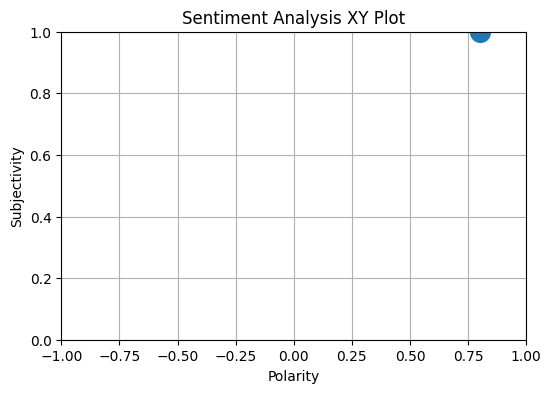

In [21]:
import re
from textblob import TextBlob

def clean(t):
    return re.sub(r'[^a-zA-Z\s]', '', t.lower())

def sentiment_truth(p):
    if p <= -0.5:
        return "very bad", "sad"
    elif p < 0:
        return "bad", "unhappy"
    elif p == 0:
        return "normal", "neutral"
    elif p < 0.5:
        return "good", "happy"
    else:
        return "best", "excited"

text = input("Enter text: ")
c = clean(text)
p = TextBlob(c).sentiment.polarity
s = TextBlob(c).sentiment.subjectivity

plt.figure(figsize=(6,4))
plt.scatter(p, s, s=200)
plt.xlim(-1,1)
plt.ylim(0,1)
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.title("Sentiment Analysis XY Plot")
plt.grid(True)
level, emotion = sentiment_truth(p)

print("\n--- SENTIMENT TABLE RESULT ---")
print(f"Polarity Score : {p}")
print(f"Sentiment Level: {level}")
print(f"Emotion Tag    : {emotion}")
